**Objetivo de negocio**

El objetivo del presente proyecto es ayudar al gerente a predecir el grupo correcto de nuevos
clientes, así como establecer cuál fue la caracterización de los clientes por segmentos.


**Metodología**
1. Limpieza y EDA: compruebe si hay problemas de calidad de datos.
Debe evaluar la calidad de los datos, así como comprender la relación entre las
características y la variable de destino.
2. Modelos predictivos: Entrene modelos predictivos (al menos 3) que te permitirán predecir
el segmento al que pertenecería cada cliente con base en los valores de sus atributos. Elija
el mejor modelo, buscando sus parámetros óptimos. Debe incluir un apartado en el que
establezcas los protocolos de evaluación y los procesos de formación y evaluación de los
modelos.
3. Reducción de dimensionalidad: Considerando todas las variables, realizar un análisis de
componentes principales (PCA), eligiendo el número de componentes necesarios para
conservar al menos el 80% de la representación original.
4. Caracterización de los clientes por segmento: Con los datos en su nueva representación,
realizar una segmentación, estableciendo el mejor número de conglomerados entre 3 y 5.
Caracterizar los conglomerados con respecto a las variables originales.

# **Importando las librerías**

In [1]:
#herramientas
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.preprocessing import StandardScaler
import string
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#métricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm
import time

#Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

# **Primer vistazo a los datos**

In [17]:
df_train.shape

(8068, 11)

In [18]:
df_train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [19]:
df_test.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               8068 non-null   string
 1   Gender           8068 non-null   string
 2   Ever_Married     7928 non-null   string
 3   Age              8068 non-null   string
 4   Graduated        7990 non-null   string
 5   Profession       7944 non-null   string
 6   Work_Experience  7239 non-null   string
 7   Spending_Score   8068 non-null   string
 8   Family_Size      7733 non-null   string
 9   Var_1            7992 non-null   string
 10  Segmentation     8068 non-null   string
dtypes: string(11)
memory usage: 693.5 KB


In [21]:
df_train.head()

ID  Gender Ever_Married Age Graduated     Profession Work_Experience  \
0  462809    Male           No  22        No     Healthcare             1.0   
1  462643  Female          Yes  38       Yes       Engineer            <NA>   
2  466315  Female          Yes  67       Yes       Engineer             1.0   
3  461735    Male          Yes  67       Yes         Lawyer             0.0   
4  462669  Female          Yes  40       Yes  Entertainment            <NA>   

  Spending_Score Family_Size  Var_1 Segmentation  
0            Low         4.0  Cat_4            D  
1        Average         3.0  Cat_4            A  
2            Low         1.0  Cat_6            B  
3           High         2.0  Cat_6            B  
4           High         6.0  Cat_6            A

In [22]:
df_train.tail()

ID  Gender Ever_Married Age Graduated  Profession Work_Experience  \
8063  464018    Male           No  22        No        <NA>             0.0   
8064  464685    Male           No  35        No   Executive             3.0   
8065  465406  Female           No  33       Yes  Healthcare             1.0   
8066  467299  Female           No  27       Yes  Healthcare             1.0   
8067  461879    Male          Yes  37       Yes   Executive             0.0   

     Spending_Score Family_Size  Var_1 Segmentation  
8063            Low         7.0  Cat_1            D  
8064            Low         4.0  Cat_4            D  
8065            Low         1.0  Cat_6            D  
8066            Low         4.0  Cat_6            B  
8067        Average         3.0  Cat_4            B

# **Conversión a un tipo apropiado de datos**

In [15]:
df_train[df_train.columns] = df_train[df_train.columns].astype('string')

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               8068 non-null   string
 1   Gender           8068 non-null   string
 2   Ever_Married     7928 non-null   string
 3   Age              8068 non-null   string
 4   Graduated        7990 non-null   string
 5   Profession       7944 non-null   string
 6   Work_Experience  7239 non-null   string
 7   Spending_Score   8068 non-null   string
 8   Family_Size      7733 non-null   string
 9   Var_1            7992 non-null   string
 10  Segmentation     8068 non-null   string
dtypes: string(11)
memory usage: 693.5 KB


# **Búsqueda de valores nulos**

In [ ]:
df.isna().any()

tweet_text            False
cyberbullying_type    False
dtype: bool

In [ ]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

# **Valores únicos del dataset**

In [ ]:
df.nunique()

tweet_text            46017
cyberbullying_type        6
dtype: int64

# **Distribución de las clases**

In [ ]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: Int64

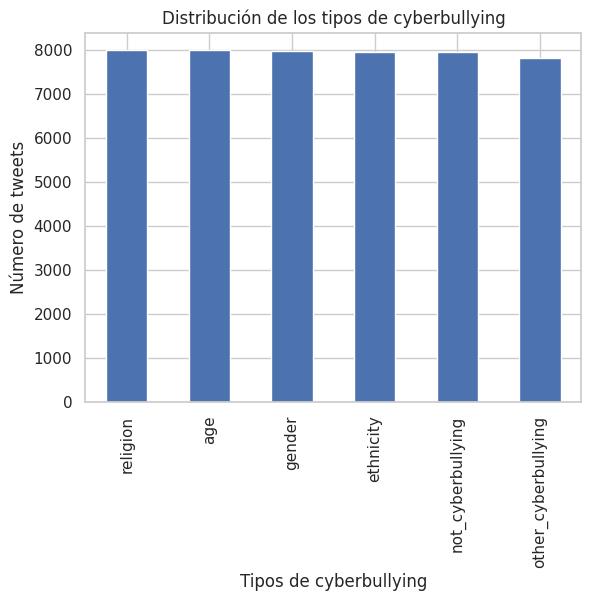

In [ ]:
class_counts = df['cyberbullying_type'].value_counts()
class_counts.plot(kind='bar')
plt.title('Distribución de los tipos de cyberbullying')
plt.xlabel('Tipos de cyberbullying')
plt.ylabel('Número de tweets')
plt.show()

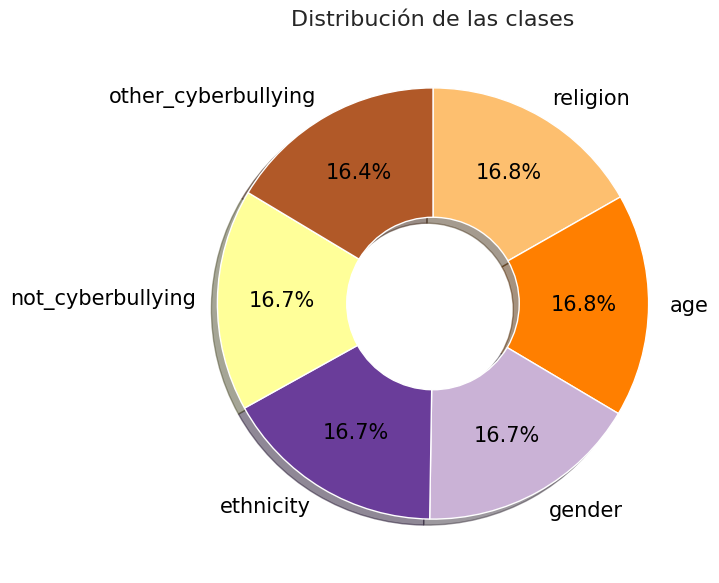

In [ ]:
plt.figure(figsize = (7,7))
sorted_counts = df['cyberbullying_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[6:])
plt.title('Distribución de las clases', fontsize = 16);

# **Limpieza de tweets**

In [ ]:
def tweets_cleaner(tweet):
    # remover las URLs
    tweet = re.sub(r'((www.\S+)|(https?://\S+))', r'', tweet)
    # remover números
    tweet = re.sub(r'[0-9]\S+', r'', tweet)
    # remover etiquetas
    tweet = re.sub(r'(@\S+) | (#\S+)', r'', tweet)
    # remover puntuación
    tweet = [char for char in tweet if char not
                                in string.punctuation]
    # convertir a string
    tweet = "".join(tweet)
    # quitar contracciones
    tweet = contractions.fix(tweet)
    # quitar dobles espacios
    tweet = re.sub("\s\s+" , " ", tweet)
    # conjunto de stopwords
    stop_words = set(stopwords.words("english"))
    # remover las stopwords
    tweet = [w for w in tweet.split()
                              if w.lower() not in stop_words]
    return tweet

# **Extracción de features**

In [ ]:
%%time

tqdm.pandas()

# extraer las features
vectorizer = CountVectorizer(analyzer = tweets_cleaner, dtype =
                            'uint8')
X_cv = vectorizer.fit_transform(df['tweet_text'])

CPU times: user 16.1 s, sys: 1.15 s, total: 17.2 s
Wall time: 24.9 s


In [ ]:
X_cv.shape

(47692, 60530)

In [ ]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

In [ ]:
X_tf.shape

(47692, 60530)

In [ ]:
X_tf

<47692x60530 sparse matrix of type '<class 'numpy.float64'>'
	with 565102 stored elements in Compressed Sparse Row format>

# **Codificar etiquetas**

In [ ]:
df['type_coded'] = df['cyberbullying_type'].astype('category')
df['type_coded'] = df['type_coded'].cat.codes
df.head()

tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

   type_coded  
0           3  
1           3  
2           3  
3           3  
4           3

# **Análisis de palabras**

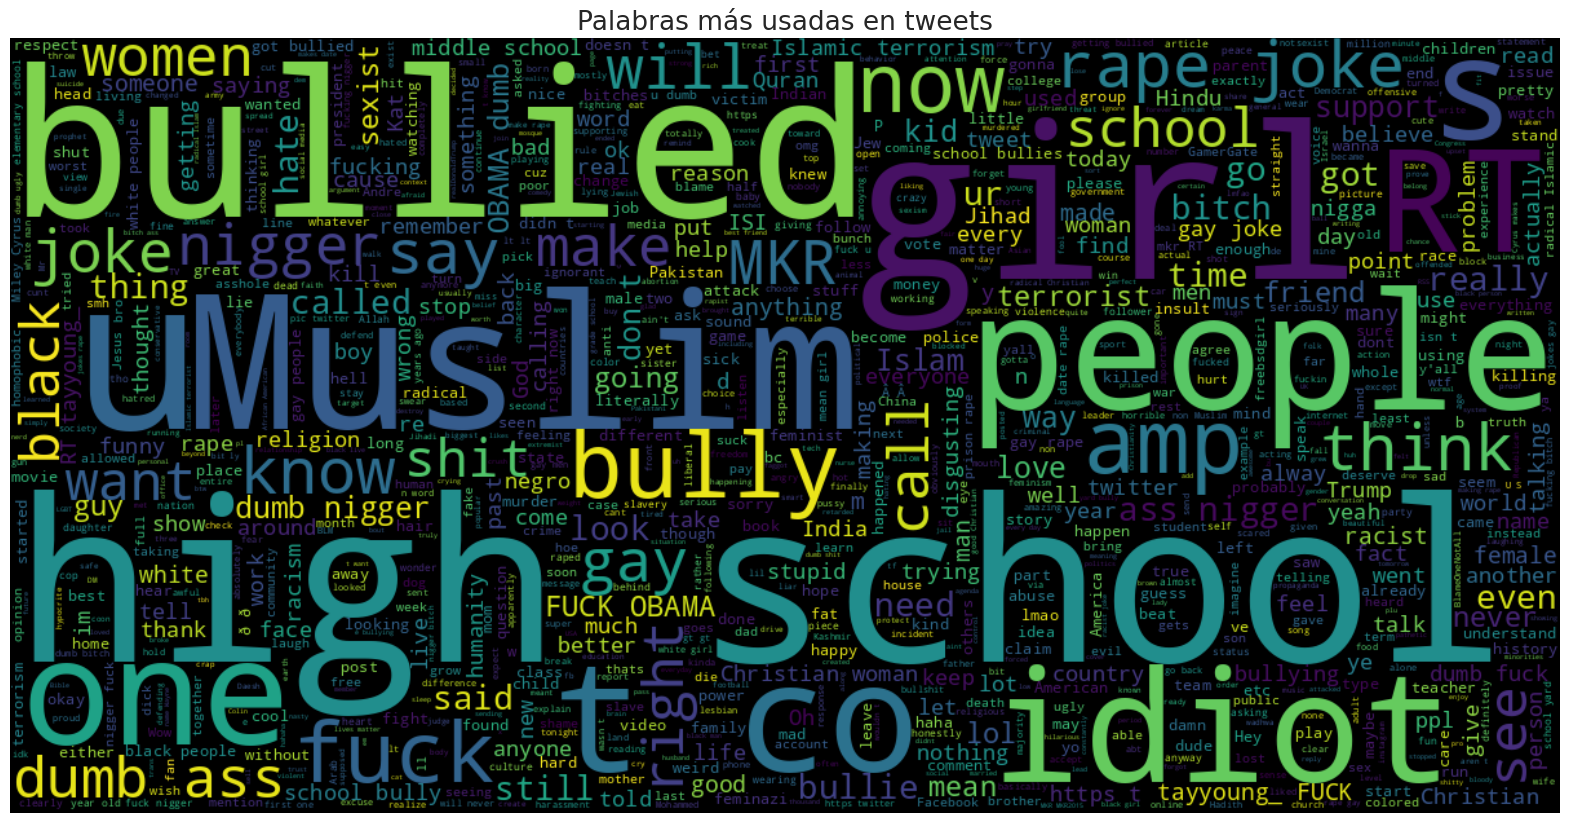

In [ ]:
text = ' '.join([word for word in df['tweet_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=1000, width=1200, height=600).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Palabras más usadas en tweets', fontsize=19)
plt.show()

# **Partición de los datos**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                                X_tf,
                                                df["type_coded"],
                                                test_size=0.2,
                                                random_state=42)

# **Módelos de clasificación**

# **1. Logistic Regression**

In [ ]:
# Crear
clf_lr = LogisticRegression(multi_class='multinomial')

In [ ]:
# Entrenar
clf_lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
# Predecir
y_pred_lr = clf_lr.predict(X_test)
y_pred_lr

array([1, 2, 1, ..., 0, 1, 4], dtype=int8)

In [ ]:
# Reporte
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1603
           1       0.97      0.95      0.96      1603
           2       0.90      0.79      0.84      1531
           3       0.52      0.56      0.54      1624
           4       0.56      0.60      0.58      1612
           5       0.94      0.93      0.93      1566

    accuracy                           0.80      9539
   macro avg       0.81      0.80      0.80      9539
weighted avg       0.81      0.80      0.80      9539



<Axes: >

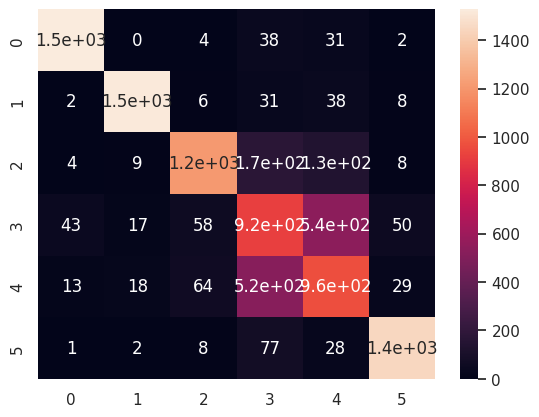

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True)

# **1. Logistic Regression: Tuning**

In [ ]:
parameters = {
    'multi_class' : ['multinomial'],
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [ ]:
log_reg = LogisticRegression()
log_reg_gs = GridSearchCV(log_reg,
                   param_grid = parameters,
                   scoring='accuracy',
                   cv=7)

In [ ]:
log_reg_gs.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'multi_class': ['multinomial'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
log_reg_gs.best_score_

0.8017456414384511

In [ ]:
log_reg_gs.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# **2. Naive Bayes**

In [ ]:
# Crear
clf_nb = MultinomialNB()

In [ ]:
# Entrenar
clf_nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predecir
y_pred_nb = clf_nb.predict(X_test)
y_pred_nb

array([1, 2, 1, ..., 0, 0, 0], dtype=int8)

In [ ]:
# Reporte
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.69      0.98      0.81      1603
           1       0.83      0.88      0.85      1603
           2       0.75      0.83      0.79      1531
           3       0.66      0.34      0.45      1624
           4       0.60      0.39      0.47      1612
           5       0.77      0.97      0.86      1566

    accuracy                           0.73      9539
   macro avg       0.72      0.73      0.71      9539
weighted avg       0.72      0.73      0.70      9539



<Axes: >

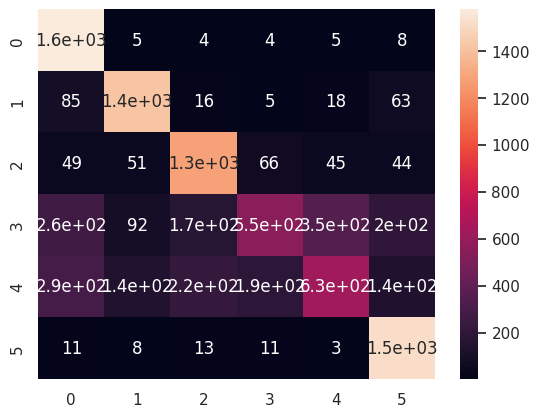

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True)

# **2. Naive Bayes: Tuning**

In [ ]:
parameters = {'alpha': [0.01, 0.001, 0.1, 0.5, 1.0, 10.0],
              'fit_prior': [True, False]
              }

In [ ]:
multi_nb = MultinomialNB()
multi_nb_gs = GridSearchCV(multi_nb,
                   param_grid = parameters,
                   scoring='accuracy',
                   cv=7)

In [ ]:
multi_nb_gs.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.001, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [ ]:
multi_nb_gs.best_score_

0.7442925210255167

In [ ]:
multi_nb_gs.best_estimator_.get_params()

{'alpha': 0.5, 'class_prior': None, 'fit_prior': False, 'force_alpha': 'warn'}

# **3. Random Forest**

In [ ]:
# Crear
clf_rf = RandomForestClassifier()

In [ ]:
# Entrenar
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predecir
y_pred_rf = clf_rf.predict(X_test)
y_pred_rf

array([1, 2, 1, ..., 0, 1, 4], dtype=int8)

In [ ]:
# Reporte
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1603
           1       0.98      0.97      0.98      1603
           2       0.88      0.81      0.85      1531
           3       0.53      0.48      0.51      1624
           4       0.53      0.62      0.57      1612
           5       0.95      0.94      0.95      1566

    accuracy                           0.80      9539
   macro avg       0.81      0.80      0.80      9539
weighted avg       0.80      0.80      0.80      9539



<Axes: >

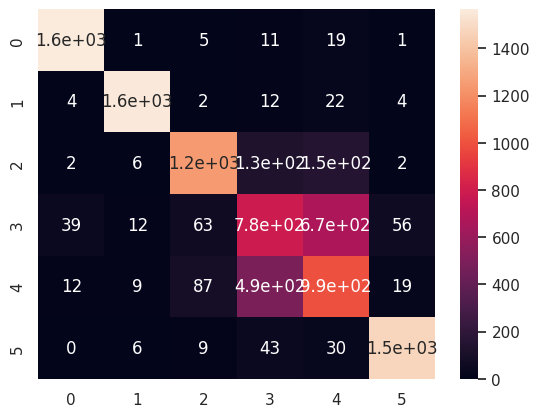

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True)

# **3. Random Forest: Tuning**

In [ ]:
parameters = {
    'n_estimators': [100, 120, 140, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [20, 25, 30],
    'max_leaf_nodes': [20, 25, 30],
}

In [ ]:
random_forest = RandomForestClassifier()
random_forest_gs = GridSearchCV(random_forest,
                   param_grid = parameters,
                   scoring='accuracy',
                   cv=7)

In [ ]:
random_forest_gs.fit(X_train, y_train)

In [ ]:
random_forest_gs.best_score_

In [ ]:
random_forest_gs.best_estimator_.get_params()

# **4. KNN**

In [ ]:
# Crear
clf_knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Entrenar
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predecir
y_pred_knn = clf_knn.predict(X_test)
y_pred_knn

array(['other_cyberbullying', 'not_cyberbullying', 'other_cyberbullying',
       ..., 'other_cyberbullying', 'other_cyberbullying',
       'other_cyberbullying'], dtype=object)

In [ ]:
# Reporte
print(classification_report(y_test, y_pred_knn))

                     precision    recall  f1-score   support

                age       0.97      0.07      0.13      1603
          ethnicity       0.99      0.21      0.35      1603
             gender       0.90      0.11      0.20      1531
  not_cyberbullying       0.23      0.13      0.16      1624
other_cyberbullying       0.16      0.79      0.27      1612
           religion       0.97      0.02      0.05      1566

           accuracy                           0.23      9539
          macro avg       0.70      0.22      0.19      9539
       weighted avg       0.70      0.23      0.19      9539



# **4. KNN: Tuning**

In [ ]:
leaf_size = list(range(1,15))
n_neighbors = list(range(1,15))
p=[1,2]
parameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [ ]:
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn,
                   param_grid = parameters,
                   scoring='accuracy',
                   cv=7)

In [ ]:
knn_gs.fit(X_train, y_train)

In [ ]:
knn_gs.best_score_

In [ ]:
knn_gs.best_estimator_.get_params()

# **Validación Cruzada cv-7**

In [ ]:
def cross_validation(model, X, y, cv=7):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=X,
                               y=y,
                               cv=cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              }

In [ ]:
models = {
    "Regresion Logistica" : LogisticRegression(multi_class='multinomial'),
    "Naive Bayes" : MultinomialNB(),
    "Random Forest" : RandomForestClassifier(),
    "KNN" : KNeighborsClassifier(n_neighbors=5)
}

In [ ]:
for i in models.keys():
  print('---------- ' + i + ' ----------')
  cross_v = cross_validation(models[i], X_tf, df['cyberbullying_type'])
  for j in cross_v.keys():
    print(f'{j} : {cross_v[j]}')
  print('--------------------')

---------- Regresion Logistica ----------
Training Accuracy scores : [0.89515143 0.89635265 0.89657281 0.89667066 0.89649943 0.89696421
 0.89769808]
Mean Training Accuracy : 89.65584675031405
Validation Accuracy scores : [0.80275903 0.80023485 0.79524439 0.80463819 0.79994129 0.80874798
 0.79935418]
Mean Validation Accuracy : 80.15599849232447
--------------------
---------- Naive Bayes ----------
Training Accuracy scores : [0.83668477 0.83712909 0.83683554 0.83788742 0.8364686  0.83739818
 0.83583258]
Mean Training Accuracy : 83.68908824466956
Validation Accuracy scores : [0.74024068 0.73800088 0.7344782  0.73095553 0.74137678 0.73726699
 0.73873477]
Mean Validation Accuracy : 73.72934046113325
--------------------
---------- Random Forest ----------
Training Accuracy scores : [0.96641225 0.96678001 0.96636415 0.96731818 0.96594829 0.96670662
 0.96663323]
Mean Training Accuracy : 96.65946763173936
Validation Accuracy scores : [0.80011741 0.80008807 0.80023485 0.80067518 0.79862028 0.7